   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

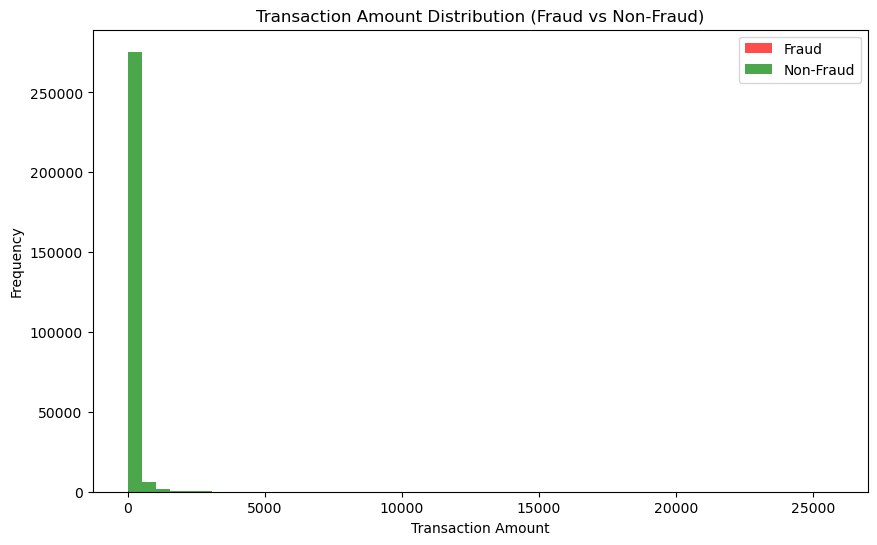

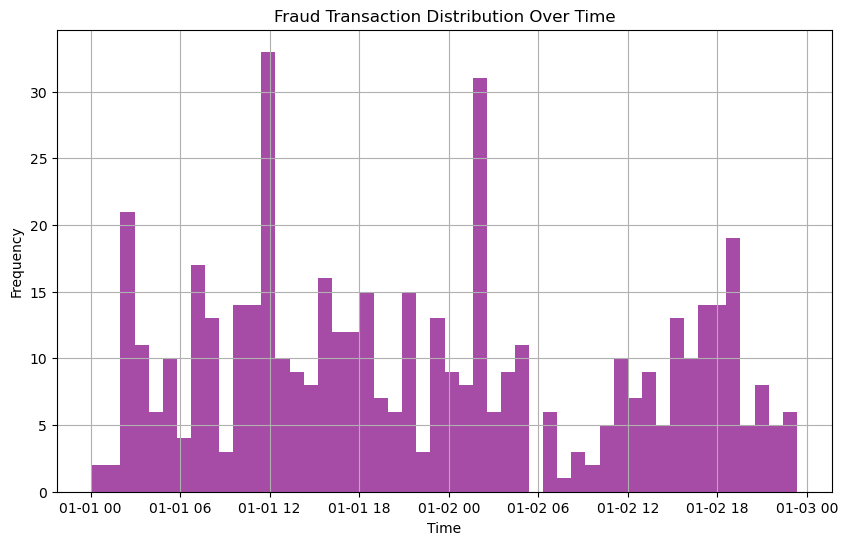

Sample Fraud Transactions:
                    Time  Amount  Class
541  1970-01-01 00:06:46    0.00      1
623  1970-01-01 00:07:52  529.00      1
4920 1970-01-01 01:14:22  239.93      1
6108 1970-01-01 01:56:26   59.00      1
6329 1970-01-01 02:05:19    1.00      1
6331 1970-01-01 02:05:26    1.00      1
6334 1970-01-01 02:05:35    1.00      1
6336 1970-01-01 02:05:43    1.00      1
6338 1970-01-01 02:05:51    1.00      1
6427 1970-01-01 02:06:50    1.00      1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Display first few rows of the dataset to understand its structure
print(df.head())

# Check dataset information (column names, missing values, data types)
print(df.info())

# Summary statistics of numeric columns
print(df.describe())

# Identify fraud cases (assuming column 'Class' denotes fraud detection: 1 for fraud, 0 for non-fraud)
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Count of fraud vs non-fraud transactions
fraud_count = fraud_df.shape[0]
non_fraud_count = non_fraud_df.shape[0]

print(f"Number of fraud cases: {fraud_count}")
print(f"Number of non-fraud cases: {non_fraud_count}")

# Analyzing the distribution of transaction amounts for fraud vs non-fraud cases
plt.figure(figsize=(10, 6))
plt.hist(fraud_df['Amount'], bins=50, alpha=0.7, label='Fraud', color='r')
plt.hist(non_fraud_df['Amount'], bins=50, alpha=0.7, label='Non-Fraud', color='g')
plt.legend()
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Fraud date analysis (assuming 'Time' is the timestamp of transactions)
# We will convert the 'Time' column to hours to check the time of frauds.
df['Time'] = pd.to_datetime(df['Time'], unit='s')  # Convert time from seconds
fraud_df.loc[:, 'Time'] = pd.to_datetime(fraud_df['Time'], unit='s')  # Fix using .loc

# Plotting fraud over time
plt.figure(figsize=(10, 6))
fraud_df['Time'].hist(bins=50, alpha=0.7, color='purple')
plt.title('Fraud Transaction Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Sample fraud transaction details (such as amount and time)
fraud_sample = fraud_df[['Time', 'Amount', 'Class']].head(10)
print("Sample Fraud Transactions:")
print(fraud_sample)